In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.layers import BatchNormalization # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

# Limpieza de Datos

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [3]:
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

El único año que contiene nulos es 2018. El resto parece estar completo.

In [8]:
df_2018.loc[df_2018['Perceptions of corruption'].isna()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Al buscar el valor faltante, se encontró que en el reporte de 2018 del World Happiness Report, Los Emiratos Árabes Unidos tienen un valor de percepción de la corrupción de 0.186, por lo que se agregó a la data faltante. Al revisar la fila a mayor detalle, se encontró que en realidad se copiaron de forma errónea todos los valores de la fila de los Emiratos Árabes Unidos, por lo que se reemplazaron los valores erróneos.  
Fuente: https://worldhappiness.report/ed/2018/#appendices-and-data  
Chapter 2: Online Data, Figure 2.2  

Helliwell, J., Layard, R., & Sachs, J. (2018). World Happiness Report 2018, New York: Sustainable Development Solutions Network.

In [9]:
df_2018.at[19, 'GDP per capita'] = 1.467
df_2018.at[19, 'Social support'] = 1.296
df_2018.at[19, 'Healthy life expectancy'] = 0.776
df_2018.at[19, 'Freedom to make life choices'] = 0.670
df_2018.at[19, 'Generosity'] = 0.284
df_2018.at[19, 'Perceptions of corruption'] = 0.186

In [10]:
df_2018.loc[19]

Overall rank                                      20
Country or region               United Arab Emirates
Score                                          6.774
GDP per capita                                 1.467
Social support                                 1.296
Healthy life expectancy                        0.776
Freedom to make life choices                    0.67
Generosity                                     0.284
Perceptions of corruption                      0.186
Name: 19, dtype: object

In [11]:
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [13]:
df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [14]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [15]:
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

En los 5 dataframes, todas las métricas son floats, el ranking son enteros y los países son objetos (strings). Todo esto es de esperar, por lo que parece ser que los dataframes tienen la estructura y tipo de datos deseado.

In [16]:
print(len(df_2015['Country'].unique()), len(df_2015))
print(len(df_2016['Country'].unique()), len(df_2016))
print(len(df_2017['Country'].unique()), len(df_2017))
print(len(df_2018['Country or region'].unique()), len(df_2018))
print(len(df_2019['Country or region'].unique()), len(df_2019))

158 158
157 157
155 155
156 156
156 156


No se encontraron países repetidos en ninguno de los datasets, ya que sus valores únicos son iguales a la longitud total de los datasets.

In [17]:
print(len(df_2015['Happiness Rank'].unique()), len(df_2015))
print(len(df_2016['Happiness Rank'].unique()), len(df_2016))
print(len(df_2017['Happiness.Rank'].unique()), len(df_2017))
print(len(df_2018['Overall rank'].unique()), len(df_2018))
print(len(df_2019['Overall rank'].unique()), len(df_2019))

157 158
154 157
155 155
156 156
156 156


En cuanto a los rankings de felicidad, hay rankings repetidos en 2015 y 2016, por lo que es necesario revisar si se debe a un verdadero empate o un error.

In [18]:
df_2015['Happiness Rank'].value_counts()

Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64

In [19]:
df_2015.loc[df_2015['Happiness Rank'].isin([82,83,84])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040


Al revisar en 2015, si se debe a un empate en el 'Happiness Score' de Jordania y Montenegro. Se maneja correctamente el empate, ya que el siguiente ranking sí salta de 82 a 84 (se omite 83, pues hay 2 países con 82).

In [20]:
df_2016['Happiness Rank'].value_counts()

Happiness Rank
57     2
34     2
145    2
1      1
108    1
      ..
54     1
55     1
56     1
59     1
157    1
Name: count, Length: 154, dtype: int64

In [21]:
df_2016.loc[df_2016['Happiness Rank'].isin([57,58,59,34,35,36,145,146,147])]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
58,Bolivia,Latin America and Caribbean,59,5.822,5.740,5.904,0.79422,0.83779,0.46970,0.50961,0.07746,0.21698,2.91635
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416
146,Yemen,Middle East and Northern Africa,147,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295


Al revisar en 2016, sí se debe a tres empates en el 'Happiness Score' de Arabia Saudita y Taiwan, Polonia y Corea del Sur, y Burkina Faso y Uganda. También hay manejo correcto de los rankings siguientes a los empates.

# EDA

In [22]:
df_2015C = pd.read_csv('2015.csv')
df_2016C = pd.read_csv('2016.csv')
df_2017C = pd.read_csv('2017.csv')
df_2018C = pd.read_csv('2018.csv')
df_2019C = pd.read_csv('2019.csv')

print(df_2015C.columns)
print(df_2016C.columns)
print(df_2017C.columns)
print(df_2018C.columns)
print(df_2019C.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

Columnas en común entre todos los años:

country,region,happiness rank, happines score,gdp,health,

country
happines rank
happines score
gdp
health
freedom
corruption
generosity
2018 no tiene family y disopia residual Solo 2018 y 2019 tienen social support

Solo 2016 y 2017 tienen Lower y Upper confidence interval

2017,2018 y 2019 no tienen region

In [23]:

dataframe_2015 = df_2015C[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2015.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2015['Year'] = 2015

# DataFrame 2016
dataframe_2016 = df_2016C[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2016.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2016['Year'] = 2016

# DataFrame 2017
dataframe_2017 = df_2017C[['Country', 'Happiness.Rank', 'Happiness.Score', 
                                 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 
                                 'Freedom', 'Trust..Government.Corruption.', 'Generosity']].copy()
dataframe_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Corruption'
}, inplace=True)
dataframe_2017['Year'] = 2017

# DataFrame 2018
dataframe_2018 = df_2018C[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2018.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2018['Year'] = 2018

# DataFrame 2019
dataframe_2019 = df_2019C[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2019.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2019['Year'] = 2019

In [24]:
# Concatenar todos los DataFrames en uno solo
df_concatenated = pd.concat([dataframe_2015, dataframe_2016, dataframe_2017, dataframe_2018, dataframe_2019], ignore_index=True)

# Verificar el resultado
print(df_concatenated.head())

       Country  Happiness Rank  Happiness Score      GDP   Health  Freedom  \
0  Switzerland               1            7.587  1.39651  0.94143  0.66557   
1      Iceland               2            7.561  1.30232  0.94784  0.62877   
2      Denmark               3            7.527  1.32548  0.87464  0.64938   
3       Norway               4            7.522  1.45900  0.88521  0.66973   
4       Canada               5            7.427  1.32629  0.90563  0.63297   

   Corruption  Generosity  Year  
0     0.41978     0.29678  2015  
1     0.14145     0.43630  2015  
2     0.48357     0.34139  2015  
3     0.36503     0.34699  2015  
4     0.32957     0.45811  2015  


# Red Neuronal

In [25]:
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model

In [26]:
def predict_happiness(df, feature_name):
    # Preparar los datos
    X = df[[feature_name]].values
    y = df['Happiness Score'].values
    
    # Escalar los datos
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    
    # Entrenar el modelo
    model = create_model(1)
    model.fit(X_scaled, y, epochs=100, batch_size=32, verbose=0)
    
    # Crear puntos para predicción
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_scaled = scaler_X.transform(X_range)
    
    # Realizar predicción
    y_pred = model.predict(X_range_scaled, verbose=0)
    
    return X_range.flatten(), y_pred.flatten()

In [39]:
def plot_results(df):
    plt.figure(figsize=(15, 12))
    
    # GDP vs Happiness
    plt.subplot(3, 2, 1)
    correlation_gdp = df['GDP'].corr(df['Happiness Score'])
    
    gdp_range, gdp_predictions = predict_happiness(df, 'GDP')
    
    plt.scatter(df['GDP'], df['Happiness Score'], alpha=0.3, color='blue', label='Datos reales')
    plt.plot(gdp_range, gdp_predictions, 'r-', linewidth=2, label='Predicción NN')
    plt.title(f'GDP vs Happiness Score\nCorrelación: {correlation_gdp:.3f}')
    plt.xlabel('GDP')
    plt.ylabel('Happiness Score')
    plt.legend()
    
    # Health vs Happiness
    plt.subplot(3, 2, 2)
    correlation_health = df['Health'].corr(df['Happiness Score'])
    
    health_range, health_predictions = predict_happiness(df, 'Health')
    
    plt.scatter(df['Health'], df['Happiness Score'], alpha=0.3, color='blue', label='Datos reales')
    plt.plot(health_range, health_predictions, 'r-', linewidth=2, label='Predicción NN')
    plt.title(f'Health vs Happiness Score\nCorrelación: {correlation_health:.3f}')
    plt.xlabel('Health (Life Expectancy)')
    plt.ylabel('Happiness Score')
    plt.legend()

    # Freedom vs Happiness
    plt.subplot(3, 2, 3)
    correlation_freedom = df['Freedom'].corr(df['Happiness Score'])

    freedom_range, freedom_predictions = predict_happiness(df, 'Freedom')

    plt.scatter(df['Freedom'], df['Happiness Score'], alpha=0.3, color='blue', label='Datos reales')
    plt.plot(freedom_range, freedom_predictions, 'r-', linewidth=2, label='Predicción NN')
    plt.title(f'Freedom vs Happiness Score\nCorrelación: {correlation_freedom:.3f}')
    plt.xlabel('Freedom')
    plt.ylabel('Happiness Score')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

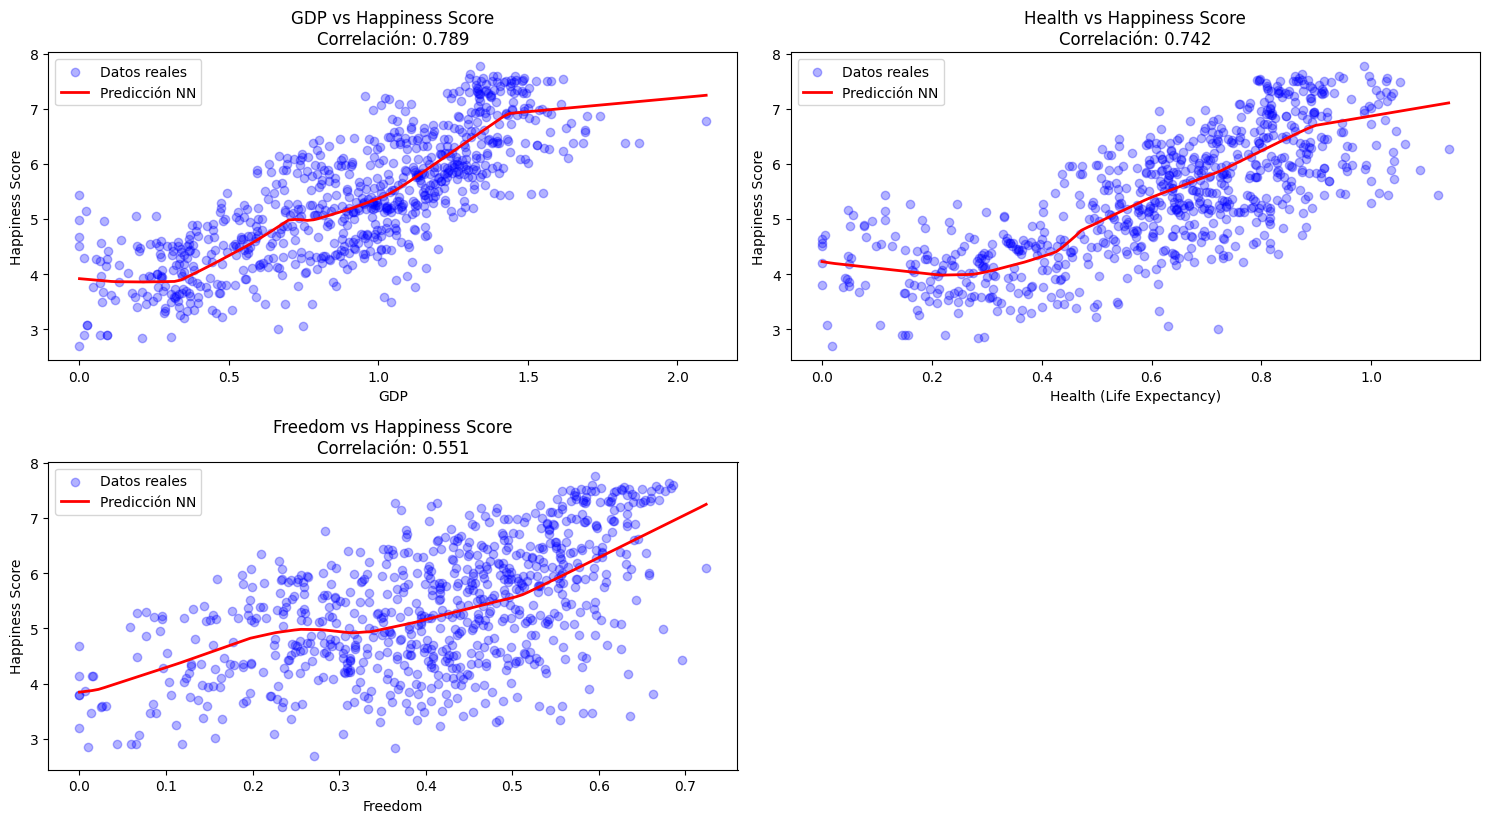

In [41]:
plot_results(df_concatenated)

In [43]:
def evaluate_model(df, feature_name):
    # Preparar los datos
    X = df[[feature_name]].values
    y = df['Happiness Score'].values
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar los datos
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    
    # Crear y entrenar el modelo
    model = create_model(1)
    
    # Añadir early stopping para evitar sobreajuste
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Entrenar el modelo
    history = model.fit(
        X_train_scaled, 
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Hacer predicciones
    y_pred = model.predict(X_test_scaled, verbose=0)
    
    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Feature': feature_name
    }

In [44]:
results_gdp = evaluate_model(df_concatenated, 'GDP')
results_health = evaluate_model(df_concatenated, 'Health')

# Mostrar resultados
print("\nResultados de la evaluación de modelos:")
print("\nModelo con GDP:")
print(f"RMSE: {results_gdp['RMSE']:.3f}")
print(f"MAE: {results_gdp['MAE']:.3f}")
print(f"R²: {results_gdp['R²']:.3f}")

print("\nModelo con Health:")
print(f"RMSE: {results_health['RMSE']:.3f}")
print(f"MAE: {results_health['MAE']:.3f}")
print(f"R²: {results_health['R²']:.3f}")

c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Resultados de la evaluación de modelos:

Modelo con GDP:
RMSE: 0.691
MAE: 0.558
R²: 0.608

Modelo con Health:
RMSE: 0.765
MAE: 0.614
R²: 0.518
